In [32]:
import sys
import datetime
import numpy as np
import pandas as pd
import string
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import gzip
import csv
import matplotlib
import matplotlib.pyplot as plt


DATA_DIR="./data/data"

In [39]:
def add(r, names, df) :
    for m in names:
        r[m].append(df[m].mean())

def tonp (r, names):
    for m in names:
        r[m] = np.array(r[m])
    
def readResults(n, shortname, name):
    m_names = ['metric', 'match', 'distance', 'numf', 'diff']
    prefix = DATA_DIR + "/results/" + shortname + str(n) + "/result_" + name
    suffix = "_" + str(n) + "_10.csv.gz"
    r = {'metric':[], 'match' : [], 'distance' : [], 'numf' : [], 'diff' : [] }
    for i in range(1, 7) :
        fullName = prefix + str(i) + suffix
        df = pd.read_csv(fullName, compression='gzip')#.drop(['Unnamed: 0'],axis=1)
        add(r, m_names, df)
    tonp(r, m_names)
    return r   



In [40]:
t2 = readResults(2, "t", "train")
t10 = readResults(10, "t", "train")
t50 = readResults(50, "t", "train")
t100 = readResults(100, "t", "train")
print(t2['metric'].mean(), t10['metric'].mean(), t50['metric'].mean(), t100['metric'].mean() )
print(t2['metric'].std(), t10['metric'].std(), t50['metric'].std(), t100['metric'].std() )


32.90336894455579 32.20774573631247 33.22120504936332 32.921806512474966
3.7189913495289586 2.7351716094045666 2.660427933930703 2.580743381217186


In [41]:
print(t2['metric'])
print(t10['metric'])
print(t50['metric'])
print(t100['metric'])


[31.41683367 37.05134    39.02692    30.37352    30.00876    29.54284   ]
[33.66763527 36.87589537 27.95506    32.37022    30.56594378 31.81172   ]
[33.72864198 38.6697992  30.60689379 33.23419552 31.36955466 31.71814516]
[32.78336756 38.25006024 29.74690283 32.47989712 31.99476954 32.27584178]


In [42]:
# v2 = readResults(2, "v", "validate")
v10 = readResults(10, "v", "validate")
# v50 = readResults(50, "v", "validate")
# v100 = readResults(100, "v", "validate")

In [46]:
print(v10['metric'].mean())
print(v10['metric'].std())
# print(t2['metric'].mean(), t10['metric'].mean(), t50['metric'].mean(), t100['metric'].mean() )
# print(t2['metric'].std(), t10['metric'].std(), t50['metric'].std(), t100['metric'].std() )

33.55968168084748
3.2519748501847516


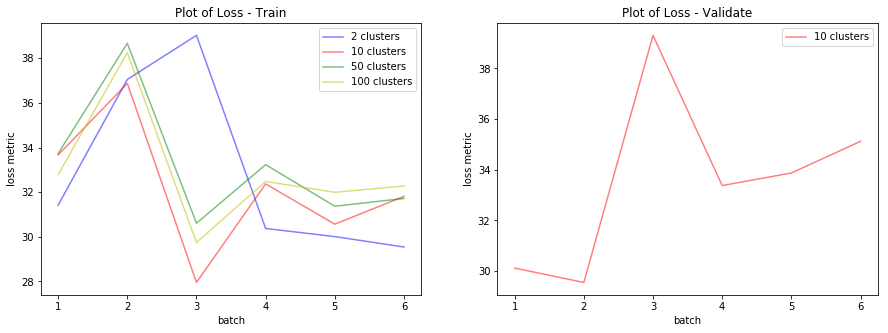

In [45]:
x = range(1, 7)
fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].set_title('Plot of Loss - Train')
axes[0].plot(x, t2['metric'], alpha=0.5, color='b', label='2 clusters')
axes[0].plot(x, t10['metric'], alpha=0.5, color='r', label='10 clusters')
axes[0].plot(x, t50['metric'], alpha=0.5, color='g', label='50 clusters')
axes[0].plot(x, t100['metric'], alpha=0.5, color='y', label='100 clusters')
axes[0].set_xlabel('batch')
axes[0].set_ylabel('loss metric')
axes[0].legend()
axes[1].set_title('Plot of Loss - Validate')
axes[1].plot(x, v10['metric'], alpha=0.5, color='r', label='10 clusters')
axes[1].set_xlabel('batch')
axes[1].set_ylabel('loss metric')
axes[1].legend()
plt.show()